In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore

In [2]:
path="/content/data.csv"

In [3]:
df = pd.read_csv('/content/data.csv')

In [4]:
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


In [5]:
# Dataset Selection and Data Preprocessing
data = df.copy()  # Copy the original DataFrame
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.sort_index()

In [6]:
# Handling missing values
data = data.fillna(method='ffill')

In [ ]:
data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)
# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Close/Last'], period=30)

In [ ]:
# Forecasting models (Using ARIMA)
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

model = ARIMA(train['Close/Last'], order=(5, 1, 0))
model_fit = model.fit()

forecast_length = len(test)
forecast = model_fit.forecast(steps=forecast_length)

In [9]:
# Model Evaluation
mse = mean_squared_error(test['Close/Last'], forecast)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 13145.11


In [14]:
# Split the data into training and test sets
train = df.iloc[:-10]
test = df.iloc[-10:]

# Convert the data in the column 'Close/Last' to type numeric after removing non-numeric characters
train['Close/Last'] = pd.to_numeric(train['Close/Last'].str.replace('$', '').str.replace(',', ''))
test['Close/Last'] = pd.to_numeric(test['Close/Last'].str.replace('$', '').str.replace(',', ''))

# Fit an ARIMA model to the training data
model = ARIMA(train['Close/Last'], order=(2, 1, 2))
model_fit = model.fit()

# Make predictions on the test data
forecast = model_fit.predict(start=len(train), end=len(df) - 1)

# Forecast the index
forecast.index = test.index

# Calculate the residuals
residuals = test['Close/Last'] - forecast

# Calculate the z-scores
z_scores = zscore(residuals)

# Identify the anomalies
anomalies = test[abs(z_scores) > 2]

print(anomalies)

Empty DataFrame
Columns: [Company, Date, Close/Last, Volume, Open, High, Low]
Index: []


In [15]:
# Visualization
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Actual vs. Forecast')

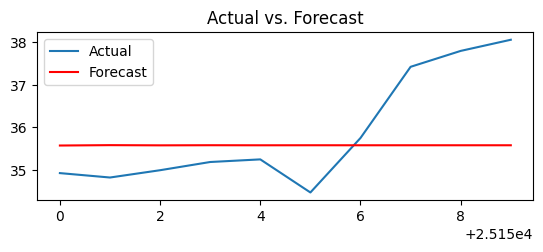

In [16]:
# Original data and forecast plot
plt.subplot(2, 1, 1)
plt.plot(test.index, test['Close/Last'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Actual vs. Forecast')

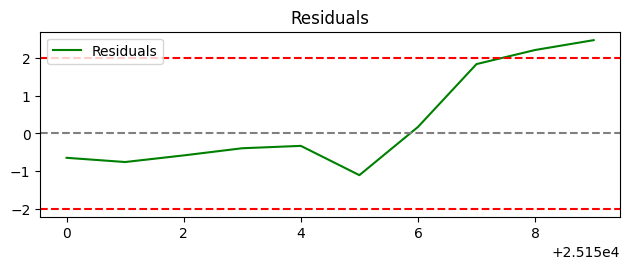

In [17]:
# Residuals plot
plt.subplot(2, 1, 2)
plt.plot(residuals.index, residuals, label='Residuals', color='green')
plt.axhline(0, color='gray', linestyle='dashed')
plt.axhline(2, color='red', linestyle='dashed')
plt.axhline(-2, color='red', linestyle='dashed')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [18]:
# Interpretation and Insights
print("Time Series Decomposition:")
print("Visualize and interpret the trend, seasonality, and residual components.")

print("\nForecasting:")
print("Use ARIMA model to forecast future values.")
print(f"Forecasted values for the next {forecast_length} periods:\n{forecast}")

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")

print("\nAnomaly Detection:")
print("Identify and investigate anomalies based on residual z-scores.")
print("Anomalous data points:")
print(anomalies)

print("\nVisualization:")
print("Plots of actual vs. forecasted data and residuals.")

print("\nInterpretation and Insights:")
print("Analyze the plots and results to gain insights into the stock market data.")

Time Series Decomposition:
Visualize and interpret the trend, seasonality, and residual components.

Forecasting:
Use ARIMA model to forecast future values.
Forecasted values for the next 5032 periods:
25150    35.574208
25151    35.583034
25152    35.578346
25153    35.581151
25154    35.579631
25155    35.580525
25156    35.580034
25157    35.580320
25158    35.580161
25159    35.580253
Name: predicted_mean, dtype: float64

Model Evaluation:
Mean Squared Error: 13145.11

Anomaly Detection:
Identify and investigate anomalies based on residual z-scores.
Anomalous data points:
Empty DataFrame
Columns: [Company, Date, Close/Last, Volume, Open, High, Low]
Index: []

Visualization:
Plots of actual vs. forecasted data and residuals.

Interpretation and Insights:
Analyze the plots and results to gain insights into the stock market data.
